### Name: Dat H. Tran
### SID: 002925316
### Email: tran.dat@northeastern.edu

In [1]:
#pip install --upgrade pip

In [2]:
#pip install tensorflow

In [3]:
#pip install tensorflow_datasets==4.9.2

In [4]:
#pip install ipywidgets

In [1]:
import tensorflow as tf

In [2]:
import tensorflow_datasets as tfds

In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import keras

In [40]:
import sklearn
from sklearn.svm import LinearSVC # Linear SVM
from sklearn.svm import SVC # Non-linear SVM
import sklearn.metrics
import sklearn.model_selection
import sklearn.preprocessing

In [8]:
print(tf.__version__) #YOUR TF VERSION CHECK


2.14.0


In [9]:
print(tfds.__version__) #YOUR TFDS VERSION CHECK

4.9.2


In [10]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
credit_approval = fetch_ucirepo(id=27) 
  
# data (as pandas dataframes) 
uci_X = credit_approval.data.features 
uci_y = credit_approval.data.targets 
  
# metadata 
print(credit_approval.metadata) 
  
# variable information 
print(credit_approval.variables) 

{'uci_id': 27, 'name': 'Credit Approval', 'repository_url': 'https://archive.ics.uci.edu/dataset/27/credit+approval', 'data_url': 'https://archive.ics.uci.edu/static/public/27/data.csv', 'abstract': 'This data concerns credit card applications; good mix of attributes', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 690, 'num_features': 15, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['A16'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1987, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C5FS30', 'creators': ['J. R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This file concerns credit card applications.  All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.\r\n  \r\nThis dataset is interesting because there is a good mix of attributes --

In [12]:
uci_X

A15    A14 A13 A12  A11 A10 A9    A8  A7  A6 A5 A4      A3     A2 A1
0      0  202.0   g   f    1   t  t  1.25   v   w  g  u   0.000  30.83  b
1    560   43.0   g   f    6   t  t  3.04   h   q  g  u   4.460  58.67  a
2    824  280.0   g   f    0   f  t  1.50   h   q  g  u   0.500  24.50  a
3      3  100.0   g   t    5   t  t  3.75   v   w  g  u   1.540  27.83  b
4      0  120.0   s   f    0   f  t  1.71   v   w  g  u   5.625  20.17  b
..   ...    ...  ..  ..  ...  .. ..   ...  ..  .. .. ..     ...    ... ..
685    0  260.0   g   f    0   f  f  1.25   h   e  p  y  10.085  21.08  b
686  394  200.0   g   t    2   t  f  2.00   v   c  g  u   0.750  22.67  a
687    1  200.0   g   t    1   t  f  2.00  ff  ff  p  y  13.500  25.25  a
688  750  280.0   g   f    0   f  f  0.04   v  aa  g  u   0.205  17.92  b
689    0    0.0   g   t    0   f  f  8.29   h   c  g  u   3.375  35.00  b

[690 rows x 15 columns]

In [13]:
uci_X.dtypes

A15      int64
A14    float64
A13     object
A12     object
A11      int64
A10     object
A9      object
A8     float64
A7      object
A6      object
A5      object
A4      object
A3     float64
A2     float64
A1      object
dtype: object

In [14]:
uci_y

A16
0     +
1     +
2     +
3     +
4     +
..   ..
685   -
686   -
687   -
688   -
689   -

[690 rows x 1 columns]

In [15]:
uci_y.dtypes

A16    object
dtype: object

In [8]:
kaggle_x = pd.read_csv("application_record.csv")
kaggle_y = pd.read_csv("credit_record.csv")

In [9]:
kaggle_x

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008805           M            Y               Y             0   
2       5008806           M            Y               Y             0   
3       5008808           F            N               Y             0   
4       5008809           F            N               Y             0   
...         ...         ...          ...             ...           ...   
438552  6840104           M            N               Y             0   
438553  6840222           F            N               N             0   
438554  6841878           F            N               N             0   
438555  6842765           F            N               Y             0   
438556  6842885           F            N               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0               Working               Higher education   
1               427500.0               Working               Higher education   
2               112500.0               Working  Secondary / secondary special   
3               270000.0  Commercial associate  Secondary / secondary special   
4               270000.0  Commercial associate  Secondary / secondary special   
...                  ...                   ...                            ...   
438552          135000.0             Pensioner  Secondary / secondary special   
438553          103500.0               Working  Secondary / secondary special   
438554           54000.0  Commercial associate               Higher education   
438555           72000.0             Pensioner  Secondary / secondary special   
438556          121500.0               Working  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             Civil marriage   Rented apartment      -12005          -4542   
1             Civil marriage   Rented apartment      -12005          -4542   
2                    Married  House / apartment      -21474          -1134   
3       Single / not married  House / apartment      -19110          -3051   
4       Single / not married  House / apartment      -19110          -3051   
...                      ...                ...         ...            ...   
438552             Separated  House / apartment      -22717         365243   
438553  Single / not married  House / apartment      -15939          -3007   
438554  Single / not married       With parents       -8169           -372   
438555               Married  House / apartment      -21673         365243   
438556               Married  House / apartment      -18858          -1201   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                1                1           0           0             NaN   
1                1                1           0           0             NaN   
2                1                0           0           0  Security staff   
3                1                0           1           1     Sales staff   
4                1                0           1           1     Sales staff   
...            ...              ...         ...         ...             ...   
438552           1                0           0           0             NaN   
438553           1                0           0           0        Laborers   
438554           1                1           0           0     Sales staff   
438555           1                0           0           0             NaN   
438556           1                0           1           0     Sales staff   

        CNT_FAM_MEMBERS  
0                   2.0  
1                   2.0  
2                   2.0  
3                   1.0  
4                   1.0  
...                 ...  
438552              1.0  
438553              1.0  
438554              1.0  
43855

In [10]:
kaggle_y

ID  MONTHS_BALANCE STATUS
0        5001711               0      X
1        5001711              -1      0
2        5001711              -2      0
3        5001711              -3      0
4        5001712               0      C
...          ...             ...    ...
1048570  5150487             -25      C
1048571  5150487             -26      C
1048572  5150487             -27      C
1048573  5150487             -28      C
1048574  5150487             -29      C

[1048575 rows x 3 columns]

# Pre-procesing

## Kaggle Dataset

This dataset contains feature information about user in application_record.csv, and user's credit usage in credit_record.csv.
The first will be used to construct the feature dataset, and the second file will be used to determine target labels.

Construct label:

The record data contains information regarding time being on loan.
From this information, we classify user with more than 60 days on loan (status with value 2 or higher) as bad credit, and otherwise good credit

In [72]:
bad_cred = kaggle_y.loc[kaggle_y['STATUS'].isin(["1","2","3","4","5"])]
bad_cred

ID  MONTHS_BALANCE STATUS
150      5001718              -8      1
154      5001718             -12      1
224      5001720               0      1
227      5001720              -3      1
228      5001720              -4      1
...          ...             ...    ...
1048241  5150464              -9      1
1048242  5150464             -10      1
1048243  5150464             -11      1
1048244  5150464             -12      1
1048245  5150464             -13      1

[14194 rows x 3 columns]

In [73]:
bad_id = bad_cred["ID"].unique()

In [74]:
len(bad_id)

5350

In [75]:
good_id = kaggle_y[~kaggle_y['ID'].isin(bad_id)]["ID"].unique()
good_id

array([5001711, 5001712, 5001713, ..., 5150484, 5150485, 5150487],
      dtype=int64)

In [55]:
len(good_id)

40635

In [76]:
bad_user = pd.DataFrame(bad_id, columns=["ID"])
bad_user["Label"] = 1

In [77]:
good_user = pd.DataFrame(good_id, columns=["ID"])
good_user["Label"] = 0

In [78]:
kaggle_y_c = pd.concat([bad_user, good_user])
kaggle_y_c.reset_index(inplace=True, drop=True)
kaggle_y_c

ID  Label
0      5001718      1
1      5001720      1
2      5001757      1
3      5001786      1
4      5001792      1
...        ...    ...
45980  5150482      0
45981  5150483      0
45982  5150484      0
45983  5150485      0
45984  5150487      0

[45985 rows x 2 columns]

In [17]:
kaggle_y_c["ID"].nunique()

45985

In [18]:
kaggle_x["ID"].nunique()

438510

It appears that the ID column of both file does not entirely match with each other

In [ ]:
kaggle_y_c

In [ ]:
kaggle_x

In [79]:
kaggle_x_c = kaggle_y_c.merge(kaggle_x, how="inner", on="ID")

In [ ]:
kaggle_x_c

In [80]:
kaggle_target = kaggle_x_c["Label"]

In [81]:
kaggle_x_c.drop("Label", axis=1, inplace=True)

We now have a more refined and completed dataset. There are 616 records as bad credit and 35841 records as good credit.

We drop the FLAG_MOBIL column which indicate if the user has a phone. All record in the column has the same value, which is make it redundant.

In [82]:
kaggle_x_c.drop("FLAG_MOBIL", axis=1, inplace=True)

### Process missing value

In [23]:
kaggle_x_c.isna().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
dtype: int64

Only OCCUPATION_TYPE have Nan values. It appears that in the original dataset, those is left blank. We consider cells with NaN value as a legit value in the column. 

In [83]:
kaggle_x_c.fillna("None", inplace=True)

In [25]:
kaggle_x_c.isna().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

### One-hot encoding

Encode categorical variable using one-hot encoding

In [84]:
def oh_encoding(df, feature):
    dummies = pd.get_dummies(df[feature])
    res = pd.concat([df, dummies], axis=1)
    res.drop(columns=feature, inplace=True)
    return res

In [85]:
kaggle_x_c_2 = kaggle_x_c.copy()

In [28]:
kaggle_x_c_2.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [86]:
for feature in ["CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE"]:
    kaggle_x_c_2 = oh_encoding(kaggle_x_c_2, feature)
kaggle_x_c_2

ID  CNT_CHILDREN  AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  \
0      5008804             0          427500.0      -12005          -4542   
1      5008805             0          427500.0      -12005          -4542   
2      5008825             0          130500.0      -10669          -1103   
3      5008826             0          130500.0      -10669          -1103   
4      5008827             0          180000.0      -18772         365243   
...        ...           ...               ...         ...            ...   
36452  5150482             1          157500.0      -10808          -1739   
36453  5150483             1          157500.0      -10808          -1739   
36454  5150484             1          157500.0      -10808          -1739   
36455  5150485             1          157500.0      -10808          -1739   
36456  5150487             0          202500.0      -19398          -2166   

       FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  F  ...  \
0                    1           0           0              2.0  0  ...   
1                    1           0           0              2.0  0  ...   
2                    0           0           0              2.0  1  ...   
3                    0           0           0              2.0  1  ...   
4                    0           0           0              2.0  0  ...   
...                ...         ...         ...              ... ..  ...   
36452                0           0           0              3.0  1  ...   
36453                0           0           0              3.0  1  ...   
36454                0           0           0              3.0  1  ...   
36455                0           0           0              3.0  1  ...   
36456                0           0           0              2.0  0  ...   

       Low-skill Laborers  Managers  Medicine staff  None  \
0                       0         0               0     1   
1                       0         0               0     1   
2                       0         0               0     0   
3                       0         0               0     0   
4                       0         0               0     1   
...                   ...       ...             ...   ...   
36452                   0         0               0     0   
36453                   0         0               0     0   
36454                   0         0               0     0   
36455                   0         0               0     0   
36456                   0         0               0     0   

       Private service staff  Realty agents  Sales staff  Secretaries  \
0                          0              0            0            0   
1                          0              0            0            0   
2                          0              0            0            0   
3                          0              0            0            0   
4                          0              0            0            0   
...                      ...            ...          ...          ...   
36452                      0              0            0            0   
36453                      0              0            0            0   
36454                      0              0            0            0   
36455                      0              0            0            0   
36456                      0              0            0            0   

       Security staff  Waiters/barmen staff  
0                   0                     0  
1                   0                     0  
2                   0                     0  
3                   0                     0  
4                   0                     0  
...               ...                   ...  
36452               0                     0  
36453               0                     0  
36454               0                     0  
36455               0                     0  
36456               0                     0  

[36457 rows x 55 column

After encoding all categorical variables, we get a sparse matrix with 55 features.

### Normalize

We normalize all values into range (0,1).

In [87]:
min = kaggle_x_c_2.min()
max = kaggle_x_c_2.max()

In [88]:
kaggle_x_c_n = (kaggle_x_c_2 - kaggle_x_c_2.min()) / (max - min)
kaggle_x_c_n

ID  CNT_CHILDREN  AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  \
0      0.000000      0.000000          0.258721    0.744324       0.029324   
1      0.000007      0.000000          0.258721    0.744324       0.029324   
2      0.000148      0.000000          0.066860    0.819963       0.038351   
3      0.000155      0.000000          0.066860    0.819963       0.038351   
4      0.000162      0.000000          0.098837    0.361207       1.000000   
...         ...           ...               ...         ...            ...   
36452  0.999965      0.052632          0.084302    0.812093       0.036681   
36453  0.999972      0.052632          0.084302    0.812093       0.036681   
36454  0.999979      0.052632          0.084302    0.812093       0.036681   
36455  0.999986      0.052632          0.084302    0.812093       0.036681   
36456  1.000000      0.000000          0.113372    0.325766       0.035561   

       FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS    F  ...  \
0                  1.0         0.0         0.0         0.052632  0.0  ...   
1                  1.0         0.0         0.0         0.052632  0.0  ...   
2                  0.0         0.0         0.0         0.052632  1.0  ...   
3                  0.0         0.0         0.0         0.052632  1.0  ...   
4                  0.0         0.0         0.0         0.052632  0.0  ...   
...                ...         ...         ...              ...  ...  ...   
36452              0.0         0.0         0.0         0.105263  1.0  ...   
36453              0.0         0.0         0.0         0.105263  1.0  ...   
36454              0.0         0.0         0.0         0.105263  1.0  ...   
36455              0.0         0.0         0.0         0.105263  1.0  ...   
36456              0.0         0.0         0.0         0.052632  0.0  ...   

       Low-skill Laborers  Managers  Medicine staff  None  \
0                     0.0       0.0             0.0   1.0   
1                     0.0       0.0             0.0   1.0   
2                     0.0       0.0             0.0   0.0   
3                     0.0       0.0             0.0   0.0   
4                     0.0       0.0             0.0   1.0   
...                   ...       ...             ...   ...   
36452                 0.0       0.0             0.0   0.0   
36453                 0.0       0.0             0.0   0.0   
36454                 0.0       0.0             0.0   0.0   
36455                 0.0       0.0             0.0   0.0   
36456                 0.0       0.0             0.0   0.0   

       Private service staff  Realty agents  Sales staff  Secretaries  \
0                        0.0            0.0          0.0          0.0   
1                        0.0            0.0          0.0          0.0   
2                        0.0            0.0          0.0          0.0   
3                        0.0            0.0          0.0          0.0   
4                        0.0            0.0          0.0          0.0   
...                      ...            ...          ...          ...   
36452                    0.0            0.0          0.0          0.0   
36453                    0.0            0.0          0.0          0.0   
36454                    0.0            0.0          0.0          0.0   
36455                    0.0            0.0          0.0          0.0   
36456                    0.0            0.0          0.0          0.0   

       Security staff  Waiters/barmen staff  
0                 0.0                   0.0  
1                 0.0                   0.0  
2                 0.0                   0.0  
3                 0.0                   0.0  
4                 0.0                   0.0  
...               ...                   ...  
36452             0.0                   0.0  
36453             0.0                   0.0  
36454             0.0                   0.0  
36455             0.0                   0.0  
36456             0.0              

### Correlation between features

In [35]:
kaggle_x_c_n.corr()

ID  CNT_CHILDREN  AMT_INCOME_TOTAL  \
ID                             1.000000      0.028878         -0.017667   
CNT_CHILDREN                   0.028878      1.000000          0.033691   
AMT_INCOME_TOTAL              -0.017667      0.033691          1.000000   
DAYS_BIRTH                     0.056016      0.339357          0.067908   
DAYS_EMPLOYED                 -0.038043     -0.229379         -0.168611   
FLAG_WORK_PHONE                0.079215      0.048091         -0.037746   
FLAG_PHONE                     0.009879     -0.016291          0.017245   
FLAG_EMAIL                    -0.046979      0.015960          0.086681   
CNT_FAM_MEMBERS                0.026624      0.889114          0.023750   
F                             -0.012022     -0.077690         -0.197805   
M                              0.012022      0.077690          0.197805   
N                              0.011163     -0.105839         -0.215506   
Y                             -0.011163      0.105839          0.215506   
N                              0.098851      0.000575         -0.032719   
Y                             -0.098851     -0.000575          0.032719   
Commercial associate          -0.001703      0.026193          0.169916   
Pensioner                     -0.038256     -0.229897         -0.167321   
State servant                  0.011081      0.044541          0.049886   
Student                       -0.024747     -0.005815         -0.005051   
Working                        0.024892      0.125908         -0.045506   
Academic degree               -0.004754      0.011516          0.017709   
Higher education               0.009661      0.046191          0.221672   
Incomplete higher              0.001884      0.014038          0.029514   
Lower secondary               -0.006791     -0.015012         -0.045035   
Secondary / secondary special -0.008208     -0.047267         -0.214640   
Civil marriage                -0.009493      0.000098         -0.011949   
Married                        0.011567      0.148251          0.000102   
Separated                     -0.019093     -0.018376          0.013163   
Single / not married           0.021528     -0.131779          0.023252   
Widow                         -0.028026     -0.098753         -0.038588   
Co-op apartment                0.016169      0.024936          0.018306   
House / apartment             -0.026219     -0.023753         -0.001902   
Municipal apartment            0.010878     -0.007340         -0.011911   
Office apartment               0.019724      0.023734          0.028390   
Rented apartment              -0.013056     -0.011397          0.029803   
With parents                   0.023663      0.029481         -0.021833   
Accountants                    0.028471      0.008146          0.029099   
Cleaning staff                -0.007817     -0.007603         -0.045692   
Cooking staff                 -0.007947     -0.009140         -0.053377   
Core staff                    -0.001217      0.074861          0.011324   
Drivers                       -0.013075      0.033651          0.056672   
HR staff                      -0.001435      0.001090          0.003362   
High skill tech staff         -0.002687      0.029568          0.018275   
IT staff                       0.015805     -0.003481          0.005255   
Laborers                       0.000148      0.037378         -0.030680   
Low-skill Laborers             0.008097      0.000906         -0.036002   
Managers                      -0.002743      0.047228          0.272512   
Medicine staff                 0.014370      0.002191         -0.037397   
None                          -0.021724     -0.164608         -0.119265   
Private service staff          0.014616      0.004958          0.011677   
Realty agents                  0.012489      0.004772          0.027842   
Sales staff                    0.007745      0.041262         -0.037372   
Secretaries                    0.006347      0.009218         

<AxesSubplot:>

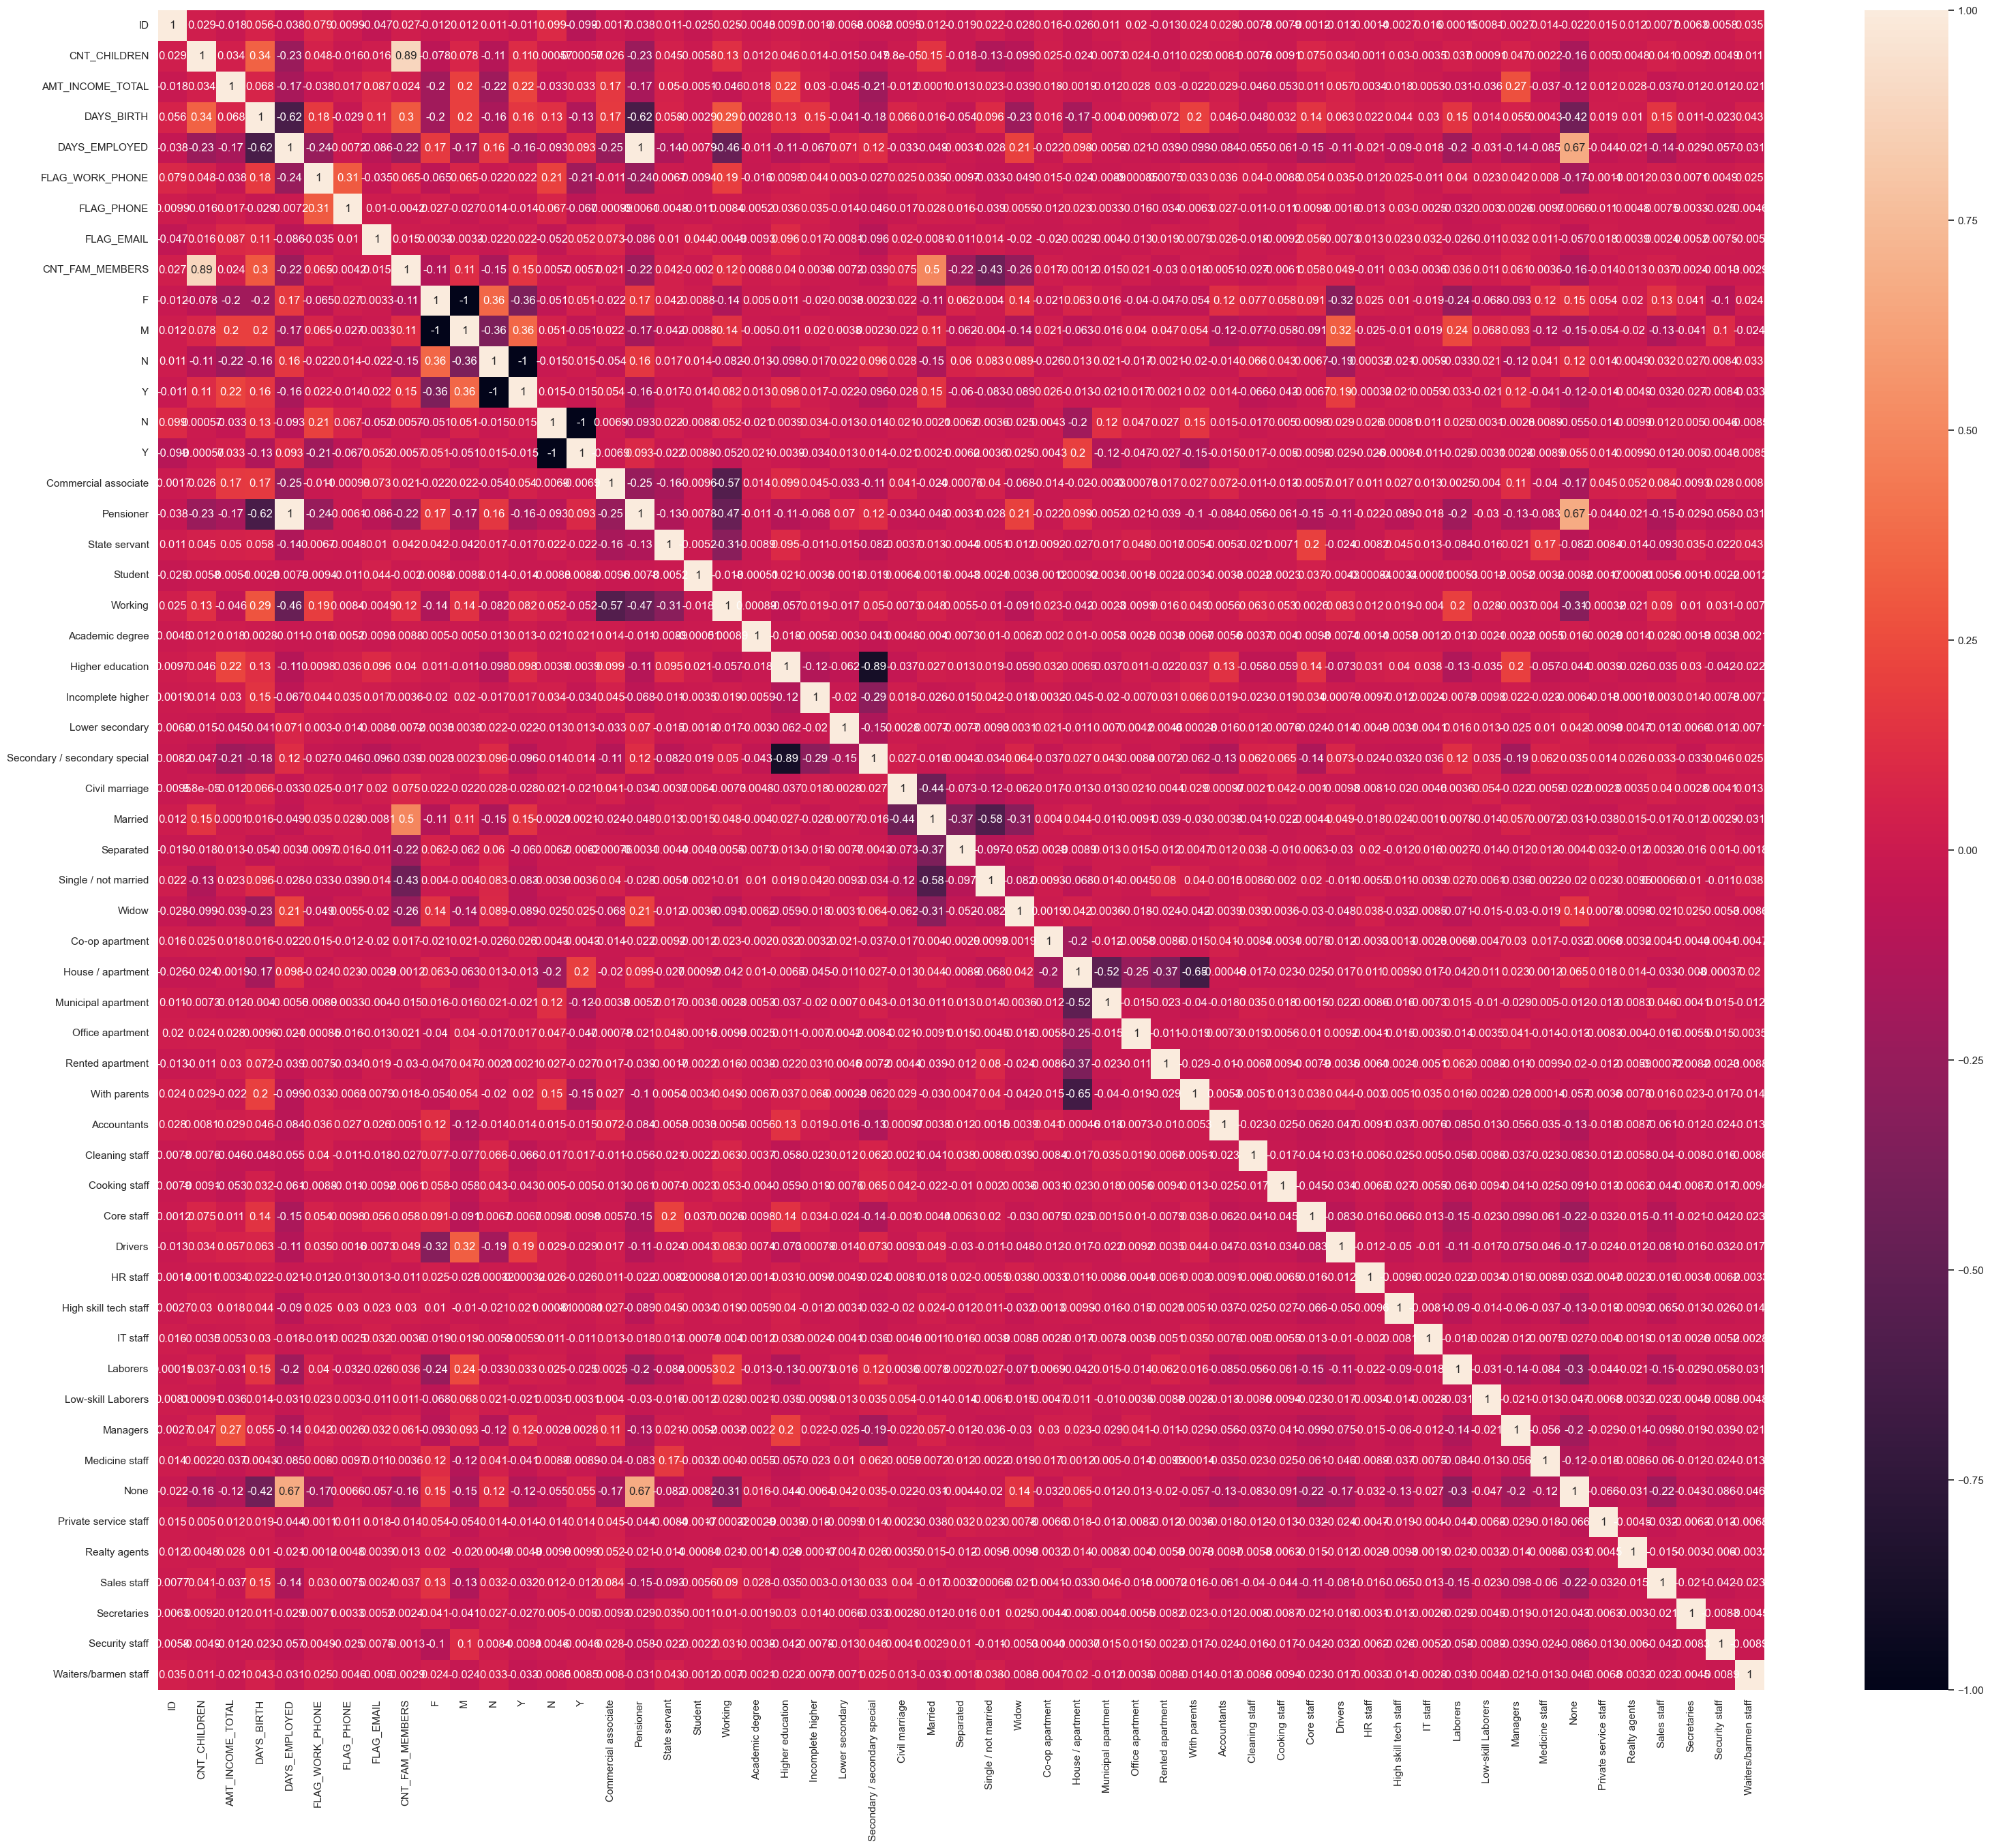

In [36]:
sns.set(rc={'figure.figsize':(38,32)})
sns.heatmap(kaggle_x_c_n.corr(), annot=True)

Some of the columns are highly related to each others.

For example, the binary categorical columns that was created by the one-hot encoding.

Being a Pensioner is identical to number of days employed.

Family member count is highly correlated to number of children.

## UCI Dataset

Convert the target's class into numeric value

In [28]:
uci_y['code'] = pd.factorize(uci_y["A16"])[0]
uci_y

C:\Users\thund\AppData\Local\Temp\ipykernel_18880\3880871673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uci_y['code'] = pd.factorize(uci_y["A16"])[0]


A16  code
0     +     0
1     +     0
2     +     0
3     +     0
4     +     0
..   ..   ...
685   -     1
686   -     1
687   -     1
688   -     1
689   -     1

[690 rows x 2 columns]

In [29]:
y_c = uci_y['code']
y_c

0      0
1      0
2      0
3      0
4      0
      ..
685    1
686    1
687    1
688    1
689    1
Name: code, Length: 690, dtype: int64

### Process missing value

In [12]:
uci_X.isna().sum()

A15     0
A14    13
A13     0
A12     0
A11     0
A10     0
A9      0
A8      0
A7      9
A6      9
A5      6
A4      6
A3      0
A2     12
A1     12
dtype: int64

In [13]:
uci_X.dtypes

A15      int64
A14    float64
A13     object
A12     object
A11      int64
A10     object
A9      object
A8     float64
A7      object
A6      object
A5      object
A4      object
A3     float64
A2     float64
A1      object
dtype: object

Mask records with any missing values

In [30]:
nan_mask = uci_X.isna().any(axis=1)
nan_mask

0      False
1      False
2      False
3      False
4      False
       ...  
685    False
686    False
687    False
688    False
689    False
Length: 690, dtype: bool

In [15]:
len(uci_X[nan_mask])

37

There are 37 records with any missing value. The missing values include both numerical values and categorical values.

We decided to discard those records from our data.

In [31]:
uci_X_1 = uci_X[nan_mask == False]
uci_X_1

A15    A14 A13 A12  A11 A10 A9    A8  A7  A6 A5 A4      A3     A2 A1
0      0  202.0   g   f    1   t  t  1.25   v   w  g  u   0.000  30.83  b
1    560   43.0   g   f    6   t  t  3.04   h   q  g  u   4.460  58.67  a
2    824  280.0   g   f    0   f  t  1.50   h   q  g  u   0.500  24.50  a
3      3  100.0   g   t    5   t  t  3.75   v   w  g  u   1.540  27.83  b
4      0  120.0   s   f    0   f  t  1.71   v   w  g  u   5.625  20.17  b
..   ...    ...  ..  ..  ...  .. ..   ...  ..  .. .. ..     ...    ... ..
685    0  260.0   g   f    0   f  f  1.25   h   e  p  y  10.085  21.08  b
686  394  200.0   g   t    2   t  f  2.00   v   c  g  u   0.750  22.67  a
687    1  200.0   g   t    1   t  f  2.00  ff  ff  p  y  13.500  25.25  a
688  750  280.0   g   f    0   f  f  0.04   v  aa  g  u   0.205  17.92  b
689    0    0.0   g   t    0   f  f  8.29   h   c  g  u   3.375  35.00  b

[653 rows x 15 columns]

In [32]:
uci_y_1 = uci_y[nan_mask == False]
uci_y_1

A16  code
0     +     0
1     +     0
2     +     0
3     +     0
4     +     0
..   ..   ...
685   -     1
686   -     1
687   -     1
688   -     1
689   -     1

[653 rows x 2 columns]

### One-hot encoding

Encode categorical variable using one-hot encoding

In [33]:
uci_X_2 = uci_X_1.copy()
uci_X_2

A15    A14 A13 A12  A11 A10 A9    A8  A7  A6 A5 A4      A3     A2 A1
0      0  202.0   g   f    1   t  t  1.25   v   w  g  u   0.000  30.83  b
1    560   43.0   g   f    6   t  t  3.04   h   q  g  u   4.460  58.67  a
2    824  280.0   g   f    0   f  t  1.50   h   q  g  u   0.500  24.50  a
3      3  100.0   g   t    5   t  t  3.75   v   w  g  u   1.540  27.83  b
4      0  120.0   s   f    0   f  t  1.71   v   w  g  u   5.625  20.17  b
..   ...    ...  ..  ..  ...  .. ..   ...  ..  .. .. ..     ...    ... ..
685    0  260.0   g   f    0   f  f  1.25   h   e  p  y  10.085  21.08  b
686  394  200.0   g   t    2   t  f  2.00   v   c  g  u   0.750  22.67  a
687    1  200.0   g   t    1   t  f  2.00  ff  ff  p  y  13.500  25.25  a
688  750  280.0   g   f    0   f  f  0.04   v  aa  g  u   0.205  17.92  b
689    0    0.0   g   t    0   f  f  8.29   h   c  g  u   3.375  35.00  b

[653 rows x 15 columns]

In [34]:
for feature in ["A13", "A12", "A10", "A9", "A7", "A6", "A5", "A4", "A1"]:
    uci_X_2 = oh_encoding(uci_X_2, feature)
uci_X_2

A15    A14  A11    A8      A3     A2  g  p  s  f  ...  w  x  g  gg  p  l  \
0      0  202.0    1  1.25   0.000  30.83  1  0  0  1  ...  1  0  1   0  0  0   
1    560   43.0    6  3.04   4.460  58.67  1  0  0  1  ...  0  0  1   0  0  0   
2    824  280.0    0  1.50   0.500  24.50  1  0  0  1  ...  0  0  1   0  0  0   
3      3  100.0    5  3.75   1.540  27.83  1  0  0  0  ...  1  0  1   0  0  0   
4      0  120.0    0  1.71   5.625  20.17  0  0  1  1  ...  1  0  1   0  0  0   
..   ...    ...  ...   ...     ...    ... .. .. .. ..  ... .. .. ..  .. .. ..   
685    0  260.0    0  1.25  10.085  21.08  1  0  0  1  ...  0  0  0   0  1  0   
686  394  200.0    2  2.00   0.750  22.67  1  0  0  0  ...  0  0  1   0  0  0   
687    1  200.0    1  2.00  13.500  25.25  1  0  0  0  ...  0  0  0   0  1  0   
688  750  280.0    0  0.04   0.205  17.92  1  0  0  1  ...  0  0  1   0  0  0   
689    0    0.0    0  8.29   3.375  35.00  1  0  0  0  ...  0  0  1   0  0  0   

     u  y  a  b  
0    1  0  0  1  
1    1  0  1  0  
2    1  0  1  0  
3    1  0  0  1  
4    1  0  0  1  
..  .. .. .. ..  
685  0  1  0  1  
686  1  0  1  0  
687  0  1  1  0  
688  1  0  0  1  
689  1  0  0  1  

[653 rows x 46 columns]

After encoding all categorical variables, we get a sparse matrix with 46 features.

### Normalize data

We normalize all values into range (0,1).

In [35]:
min = uci_X_2.min()
max = uci_X_2.max()

In [36]:
uci_X_n = (uci_X_2 - uci_X_2.min()) / (max - min)
uci_X_n

A15     A14       A11        A8        A3        A2    g    p    s  \
0    0.00000  0.1010  0.014925  0.043860  0.000000  0.271111  1.0  0.0  0.0   
1    0.00560  0.0215  0.089552  0.106667  0.159286  0.713016  1.0  0.0  0.0   
2    0.00824  0.1400  0.000000  0.052632  0.017857  0.170635  1.0  0.0  0.0   
3    0.00003  0.0500  0.074627  0.131579  0.055000  0.223492  1.0  0.0  0.0   
4    0.00000  0.0600  0.000000  0.060000  0.200893  0.101905  0.0  0.0  1.0   
..       ...     ...       ...       ...       ...       ...  ...  ...  ...   
685  0.00000  0.1300  0.000000  0.043860  0.360179  0.116349  1.0  0.0  0.0   
686  0.00394  0.1000  0.029851  0.070175  0.026786  0.141587  1.0  0.0  0.0   
687  0.00001  0.1000  0.014925  0.070175  0.482143  0.182540  1.0  0.0  0.0   
688  0.00750  0.1400  0.000000  0.001404  0.007321  0.066190  1.0  0.0  0.0   
689  0.00000  0.0000  0.000000  0.290877  0.120536  0.337302  1.0  0.0  0.0   

       f  ...    w    x    g   gg    p    l    u    y    a    b  
0    1.0  ...  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  
1    1.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  
2    1.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  
3    0.0  ...  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  
4    1.0  ...  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
685  1.0  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  
686  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  
687  0.0  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  
688  1.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  
689  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  

[653 rows x 46 columns]

### Correlation between features

In [37]:
uci_X_n.corr()

A15       A14       A11        A8        A3        A2         g  \
A15  1.000000  0.073384  0.058408  0.052159  0.119754  0.029078 -0.046504   
A14  0.073384  1.000000 -0.116101 -0.064781 -0.217076 -0.084618 -0.054534   
A11  0.058408 -0.116101  1.000000  0.327325  0.269834  0.198153  0.135084   
A8   0.052159 -0.064781  0.327325  1.000000  0.300600  0.417647  0.004184   
A3   0.119754 -0.217076  0.269834  0.300600  1.000000  0.217681  0.095818   
A2   0.029078 -0.084618  0.198153  0.417647  0.217681  1.000000  0.024057   
g   -0.046504 -0.054534  0.135084  0.004184  0.095818  0.024057  1.000000   
p    0.517251  0.034489 -0.027936 -0.024588  0.080031 -0.027733 -0.182765   
s   -0.057369  0.048483 -0.131727  0.000720 -0.113640 -0.018854 -0.980012   
f   -0.027534 -0.139708 -0.005757 -0.139317  0.006083 -0.058133  0.017292   
t    0.027534  0.139708  0.005757  0.139317 -0.006083  0.058133 -0.017292   
f   -0.068189  0.038994 -0.569176 -0.228035 -0.166092 -0.103633 -0.235225   
t    0.068189 -0.038994  0.569176  0.228035  0.166092  0.103633  0.235225   
f   -0.084427  0.057225 -0.378264 -0.336148 -0.236751 -0.218637 -0.114911   
t    0.084427 -0.057225  0.378264  0.336148  0.236751  0.218637  0.114911   
bb   0.053200  0.067590  0.042220  0.057188 -0.011504  0.139163 -0.031014   
dd  -0.009700 -0.015572 -0.025907 -0.047888  0.009530 -0.066297  0.029205   
ff  -0.037362 -0.126250 -0.034857 -0.067728  0.021529  0.180817  0.030996   
h   -0.003793  0.055325  0.057716  0.180914  0.057787  0.021420  0.075012   
j   -0.018694 -0.036993 -0.022484 -0.064901 -0.035712 -0.011793 -0.016350   
n   -0.012309 -0.026778  0.003917 -0.009801 -0.003685 -0.055873  0.023809   
o    0.517884  0.014713 -0.027936 -0.034173  0.075452  0.006237 -0.082978   
v   -0.061391  0.024695 -0.060301 -0.158205 -0.100989 -0.227986 -0.066099   
z    0.026332 -0.105039  0.095286  0.197525  0.205506  0.250044  0.033775   
aa  -0.035448 -0.006550 -0.068499 -0.070971  0.024942 -0.077773  0.048471   
c   -0.016173 -0.041964  0.036913  0.013691 -0.042999 -0.082792  0.016459   
cc   0.046670  0.064998  0.122082  0.058160 -0.038523 -0.027605  0.031481   
d   -0.034347 -0.042678 -0.039533 -0.019232  0.015751 -0.015572 -0.079247   
e    0.080198 -0.024569  0.026140  0.112163  0.141451  0.153542  0.000628   
ff   0.075192 -0.111403 -0.041894 -0.071900  0.047796  0.183399  0.025119   
i   -0.026688  0.020795 -0.051785 -0.026144 -0.039429  0.034830 -0.007297   
j   -0.020540 -0.043130  0.004966 -0.082013 -0.004035 -0.000820  0.037820   
k   -0.026697 -0.004092 -0.056865 -0.055051 -0.050615 -0.001584 -0.041352   
m   -0.005985  0.080298 -0.022514  0.024840 -0.077954  0.037645 -0.230808   
q   -0.023329 -0.032244  0.074808  0.049387  0.032533 -0.060427  0.074657   
r    0.122431 -0.033002  0.006811  0.039611  0.010375 -0.009900  0.020603   
w   -0.023083  0.035912 -0.019479 -0.007985 -0.012887 -0.047935  0.024396   
x    0.003625  0.128716  0.016106  0.049698  0.057106  0.011051  0.049096   
g   -0.015217 -0.028564  0.112154  0.078552  0.084785  0.108843  0.000378   
gg   0.517251  0.064153 -0.027936  0.045344  0.070155 -0.064258 -0.182765   
p   -0.052348  0.020305 -0.109011 -0.084838 -0.094344 -0.100936  0.023518   
l    0.517251  0.064153 -0.027936  0.045344  0.070155 -0.064258 -0.182765   
u   -0.015217 -0.028564  0.112154  0.078552  0.084785  0.108843  0.000378   
y   -0.052348  0.020305 -0.109011 -0.084838 -0.094344 -0.100936  0.023518   
a   -0.013099 -0.077617  0.016683 -0.084899  0.034906 -0.042177  0.084560   
b    0.013099  0.077617 -0.016683  0.084899 -0.034906  0.042177 -0.084560   

            p         s         f  ...         w         x         g  \
A15  0.517251 -0.057369 -0.027534  ... -0.023083  0.003625 -0.015217   
A14  0.034489  0.048483 -0.139708  ...  0.035912  0.128716 -0.028564   
A11 -0.027936 -0.131727 -0.005757  ... -0.019479  0.016106  0.112154   
A8  -0.024588  0.000720 -0.139317  ... -0.007985  0.049698  0.078552   
A3   0.080031 -0.113640  0.006

<AxesSubplot:>

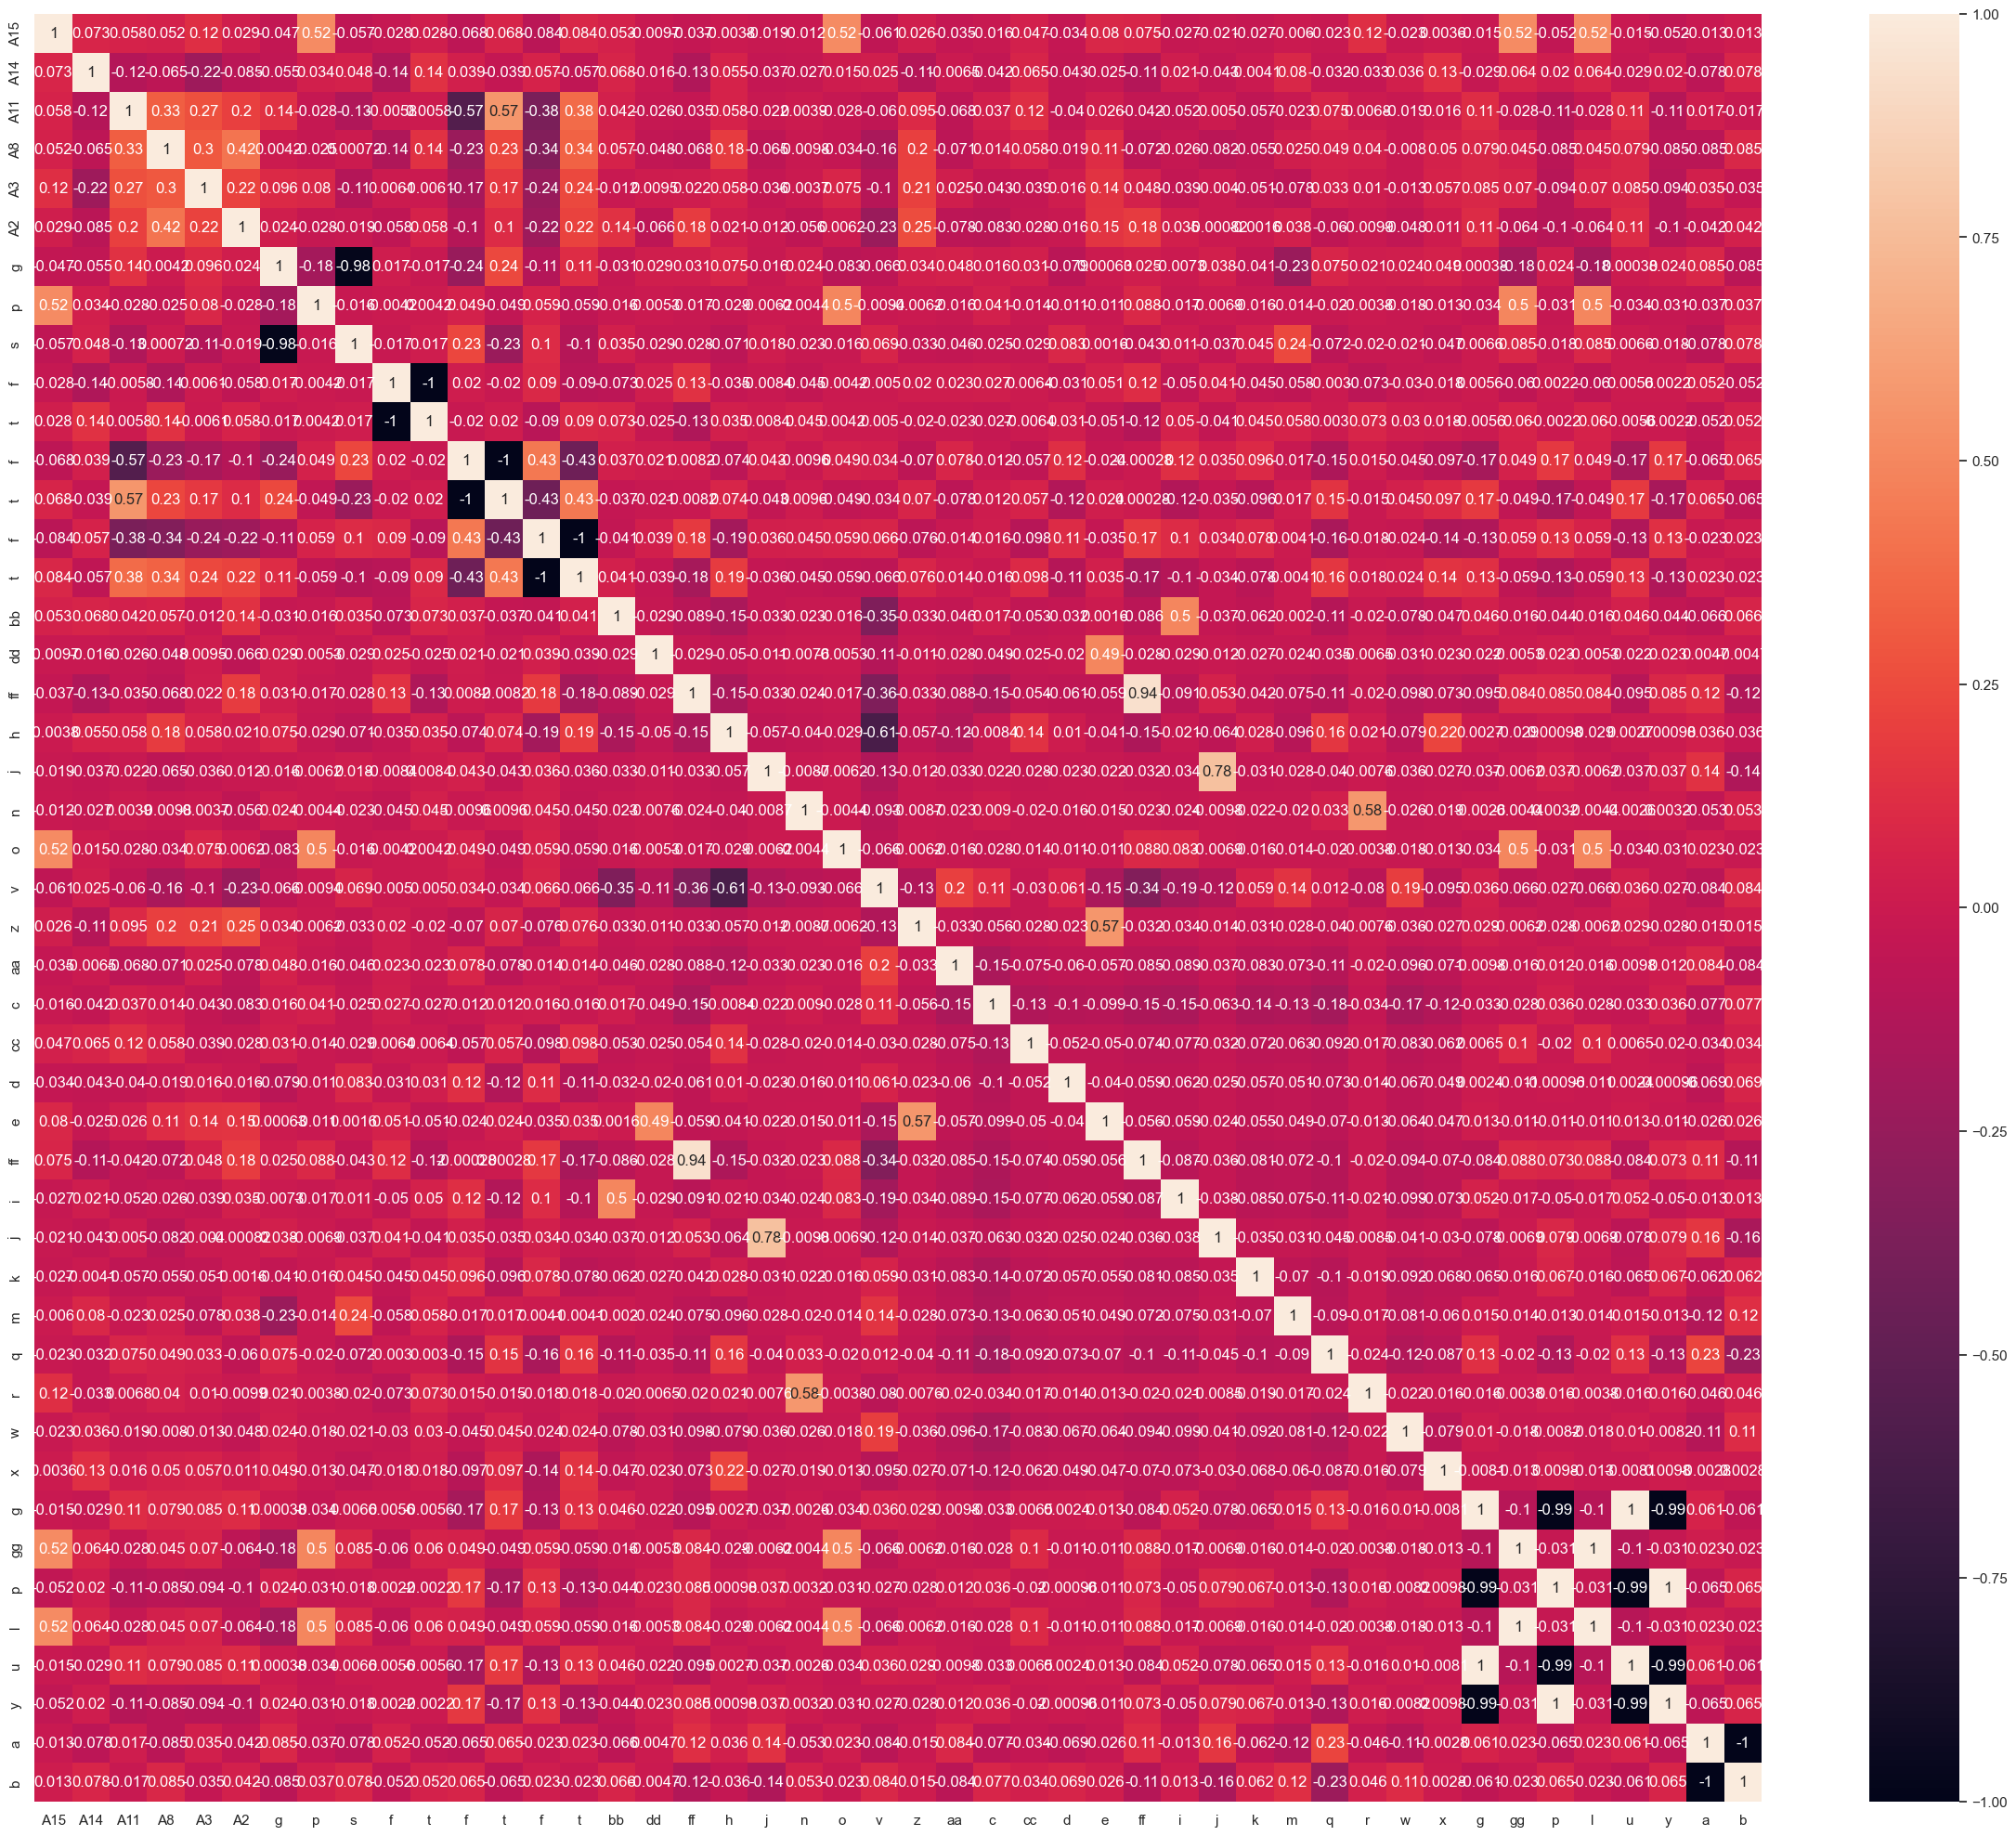

In [38]:
sns.set(rc={'figure.figsize':(30,25)})
sns.heatmap(uci_X_n.corr(), annot=True)

The covariance heatmap show that some of the encoded values of the categorical variables is highly correlated, or even identical (or inversely identical). This is due to some of the categorical variable being binary in value.
* For example Column "a", "b" at the end likely show a binary categorical variable.

The original numerical variables can be considered unrelated with each other, with the highest coefficient at 0.42.

# Training - ANN

## Kaggle Dataset

In [89]:
kaggle_target.value_counts()

0    32166
1     4291
Name: Label, dtype: int64

The Kaggle dataset is highly imbalanced. Our interest is to detect bad credit user.

In [90]:
kaggle_x_c_n["Label"] = kaggle_target
kaggle_x_c_n

ID  CNT_CHILDREN  AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  \
0      0.000000      0.000000          0.258721    0.744324       0.029324   
1      0.000007      0.000000          0.258721    0.744324       0.029324   
2      0.000148      0.000000          0.066860    0.819963       0.038351   
3      0.000155      0.000000          0.066860    0.819963       0.038351   
4      0.000162      0.000000          0.098837    0.361207       1.000000   
...         ...           ...               ...         ...            ...   
36452  0.999965      0.052632          0.084302    0.812093       0.036681   
36453  0.999972      0.052632          0.084302    0.812093       0.036681   
36454  0.999979      0.052632          0.084302    0.812093       0.036681   
36455  0.999986      0.052632          0.084302    0.812093       0.036681   
36456  1.000000      0.000000          0.113372    0.325766       0.035561   

       FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS    F  ...  \
0                  1.0         0.0         0.0         0.052632  0.0  ...   
1                  1.0         0.0         0.0         0.052632  0.0  ...   
2                  0.0         0.0         0.0         0.052632  1.0  ...   
3                  0.0         0.0         0.0         0.052632  1.0  ...   
4                  0.0         0.0         0.0         0.052632  0.0  ...   
...                ...         ...         ...              ...  ...  ...   
36452              0.0         0.0         0.0         0.105263  1.0  ...   
36453              0.0         0.0         0.0         0.105263  1.0  ...   
36454              0.0         0.0         0.0         0.105263  1.0  ...   
36455              0.0         0.0         0.0         0.105263  1.0  ...   
36456              0.0         0.0         0.0         0.052632  0.0  ...   

       Managers  Medicine staff  None  Private service staff  Realty agents  \
0           0.0             0.0   1.0                    0.0            0.0   
1           0.0             0.0   1.0                    0.0            0.0   
2           0.0             0.0   0.0                    0.0            0.0   
3           0.0             0.0   0.0                    0.0            0.0   
4           0.0             0.0   1.0                    0.0            0.0   
...         ...             ...   ...                    ...            ...   
36452       0.0             0.0   0.0                    0.0            0.0   
36453       0.0             0.0   0.0                    0.0            0.0   
36454       0.0             0.0   0.0                    0.0            0.0   
36455       0.0             0.0   0.0                    0.0            0.0   
36456       0.0             0.0   0.0                    0.0            0.0   

       Sales staff  Secretaries  Security staff  Waiters/barmen staff  Label  
0              0.0          0.0             0.0                   0.0      1  
1              0.0          0.0             0.0                   0.0      1  
2              0.0          0.0             0.0                   0.0      1  
3              0.0          0.0             0.0                   0.0      1  
4              0.0          0.0             0.0                   0.0      1  
...            ...          ...             ...                   ...    ...  
36452          0.0          0.0             0.0                   0.0      0  
36453          0.0          0.0             0.0                   0.0      0  
36454          0.0          0.0             0.0                   0.0      0  
36455          0.0          0.0             0.0                   0.0      0  
36456          0.0          0.0             0.0                   0.0      0  

[36457 rows x 56 columns]

We split the dataset into 20% test set, 16% validation set and 64% training set.

In [91]:
# Split and shuffle dataset.
kaggle_train, kaggle_test = sklearn.model_selection.train_test_split(kaggle_x_c_n, test_size=0.2)
kaggle_train, kaggle_val = sklearn.model_selection.train_test_split(kaggle_train, test_size=0.2)

# Form np arrays of labels and features.
kaggle_train_labels = np.array(kaggle_train.pop('Label'))
bool_train_labels = kaggle_train_labels != 0
kaggle_val_labels = np.array(kaggle_val.pop('Label'))
kaggle_test_labels = np.array(kaggle_test.pop('Label'))

In [92]:
kaggle_train_labels.mean()

0.11764957997599863

In [93]:
kaggle_val_labels.mean()

0.11914966569518258

In [94]:
kaggle_test_labels.mean()

0.11670323642347778

The 3 sets have about the same proportion of bad credit records.

In [95]:
train_features = np.array(kaggle_train)
val_features = np.array(kaggle_val)
test_features = np.array(kaggle_test)

In [96]:
scaler = sklearn.preprocessing.StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', kaggle_train_labels.shape)
print('Validation labels shape:', kaggle_val_labels.shape)
print('Test labels shape:', kaggle_test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (23332,)
Validation labels shape: (5833,)
Test labels shape: (7292,)
Training features shape: (23332, 55)
Validation features shape: (5833, 55)
Test features shape: (7292, 55)


In [47]:
print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training features shape: (23332, 55)
Validation features shape: (5833, 55)
Test features shape: (7292, 55)


In [97]:
METRICS = [
      keras.metrics.BinaryCrossentropy(name='cross entropy'),  # same as model's loss
      keras.metrics.MeanSquaredError(name='Brier score'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.Input(shape=(55)),

      keras.layers.Dense(
        55, activation='relu'),
      # keras.layers.Dense(
      #   28, activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [98]:
EPOCHS = 100
BATCH_SIZE = 128

# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_prc', 
#     verbose=1,
#     patience=10,
#     mode='max',
#     restore_best_weights=True)

We choose a large batch size so that each batch have a good chance to contains bad credit records.

In [99]:
neg, pos = np.bincount(kaggle_target)
total = neg + pos
print('Total: {}\nPositive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Total: 36457
Positive: 4291 (11.77% of total)



Since our data is imbalanced, we config the model with an initial bias.

In [100]:
initial_bias = np.log([pos/neg])
initial_bias

array([-2.01439019])

We also give more weights to the positive class in the loss function.

In [101]:
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.57
Weight for class 1: 4.25


In [102]:
kaggle_model = make_model(output_bias=initial_bias)
kaggle_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 55)                3080      
                                                                 
 dropout_2 (Dropout)         (None, 55)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 56        
                                                                 
Total params: 3136 (12.25 KB)
Trainable params: 3136 (12.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [103]:
history = kaggle_model.fit(
    train_features,
    kaggle_train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(val_features, kaggle_val_labels), 
    verbose=1,
    # Class weights
    class_weight=class_weight)


Epoch 1/100
183/183 [==============================] - 2s 4ms/step - loss: 0.9229 - cross entropy: 0.6117 - Brier score: 0.2061 - tp: 711.0000 - fp: 5240.0000 - tn: 15347.0000 - fn: 2034.0000 - accuracy: 0.6882 - precision: 0.1195 - recall: 0.2590 - auc: 0.5093 - prc: 0.1224 - val_loss: 0.6521 - val_cross entropy: 0.6521 - val_Brier score: 0.2297 - val_tp: 253.0000 - val_fp: 1612.0000 - val_tn: 3526.0000 - val_fn: 442.0000 - val_accuracy: 0.6479 - val_precision: 0.1357 - val_recall: 0.3640 - val_auc: 0.5395 - val_prc: 0.1352
Epoch 2/100
183/183 [==============================] - 0s 2ms/step - loss: 0.7815 - cross entropy: 0.7253 - Brier score: 0.2583 - tp: 1162.0000 - fp: 8365.0000 - tn: 12222.0000 - fn: 1583.0000 - accuracy: 0.5736 - precision: 0.1220 - recall: 0.4233 - auc: 0.5128 - prc: 0.1238 - val_loss: 0.6302 - val_cross entropy: 0.6302 - val_Brier score: 0.2191 - val_tp: 218.0000 - val_fp: 1244.0000 - val_tn: 3894.0000 - val_fn: 477.0000 - val_accuracy: 0.7050 - val_precision: 0

In [70]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  plt.figure(figsize=(10,10))
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

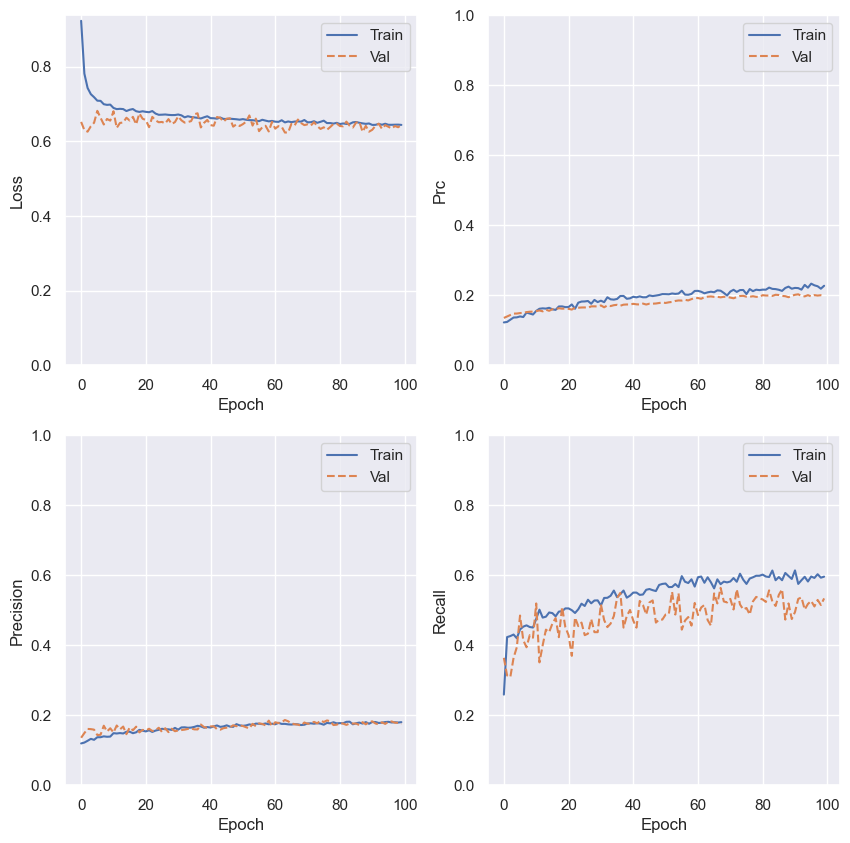

In [104]:
plot_metrics(history)

In [105]:
train_predictions_weighted = kaggle_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = kaggle_model.predict(test_features, batch_size=BATCH_SIZE)


57/57 [==============================] - 0s 661us/step


In [67]:
def plot_cm(labels, predictions, threshold=0.5):
  cm = tf.math.confusion_matrix(labels, predictions > threshold)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(threshold))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Good Credit Predicted (True Negatives): ', cm[0][0])
  print('Good Credit Predicted Incorrectly (False Positives): ', cm[0][1])
  print('Bad Credit Missed (False Negatives): ', cm[1][0])
  print('Bad Credit Predicted (True Positives): ', cm[1][1])
  print('Total Bad Credit: ', np.sum(cm[1]))


 1/57 [..............................] - ETA: 0s - loss: 0.6600 - cross entropy: 0.6600 - Brier score: 0.2338 - tp: 9.0000 - fp: 49.0000 - tn: 64.0000 - fn: 6.0000 - accuracy: 0.5703 - precision: 0.1552 - recall: 0.6000 - auc: 0.6593 - prc: 0.1821

57/57 [==============================] - 0s 1ms/step - loss: 0.6441 - cross entropy: 0.6441 - Brier score: 0.2264 - tp: 477.0000 - fp: 2199.0000 - tn: 4242.0000 - fn: 374.0000 - accuracy: 0.6471 - precision: 0.1783 - recall: 0.5605 - auc: 0.6361 - prc: 0.1971
loss :  0.6441189050674438
cross entropy :  0.6441189050674438
Brier score :  0.22642359137535095
tp :  477.0
fp :  2199.0
tn :  4242.0
fn :  374.0
accuracy :  0.647147536277771
precision :  0.17825111746788025
recall :  0.5605170130729675
auc :  0.6361177563667297
prc :  0.19705773890018463

Good Credit Predicted (True Negatives):  tf.Tensor(4242, shape=(), dtype=int32)
Good Credit Predicted Incorrectly (False Positives):  tf.Tensor(2199, shape=(), dtype=int32)
Bad Credit Missed (False Negatives):  tf.Tensor(374, shape=(), dtype=int32)
Bad Credit Predicted (True Positives):  tf.Tensor(477, shape=(), dtype=int32)
Total Bad Credit:  851


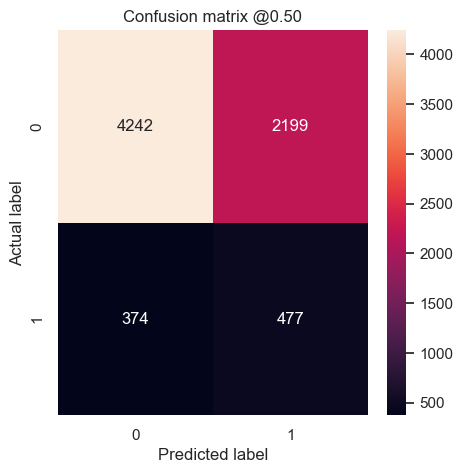

In [106]:
weighted_results = kaggle_model.evaluate(test_features, kaggle_test_labels,
                                           batch_size=BATCH_SIZE, verbose=1)
for name, value in zip(kaggle_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(kaggle_test_labels, test_predictions_weighted, threshold=0.5)


## UCI Dataset

In [27]:
uci_y_1.value_counts()

A16  code
-    1       357
+    0       296
dtype: int64

Our data already have a fairly balanced number of samples in both classes.

In [28]:
tf_ds = tf.data.Dataset.from_tensor_slices((uci_X_n, uci_y_1["code"]))

In [34]:
tf_ds

<_TensorSliceDataset element_spec=(TensorSpec(shape=(46,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [41]:
import datetime

In [42]:
tf_ds = tf_ds.shuffle(tf_ds.cardinality(), seed=int(datetime.datetime.now().timestamp()))

We split the dataset into: 70% as training set, 15% as validation set and 15% as test set. 

In [43]:
train_portion = 0.7
val_portion = 0.15
train_size = int(train_portion * int(tf_ds.cardinality()))
val_size = int(val_portion * int(tf_ds.cardinality()))
test_size = int(tf_ds.cardinality()) - train_size - val_size
print("Train size: " + str(train_size))
print("Validation size: " + str(val_size))
print("Test size: " + str(test_size))

Train size: 457
Validation size: 97
Test size: 99


In [44]:
ds_train = tf_ds.take(train_size)
ds_val = tf_ds.skip(train_size).take(val_size)
ds_test = tf_ds.skip(train_size + val_size)

In [45]:
#y_val = [y for x, y in tf_ds]
#y_val

In [46]:
print(ds_train)
print(ds_val)
print(ds_test)

<_TakeDataset element_spec=(TensorSpec(shape=(46,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_TakeDataset element_spec=(TensorSpec(shape=(46,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_SkipDataset element_spec=(TensorSpec(shape=(46,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [47]:
ds_train.cardinality()

<tf.Tensor: shape=(), dtype=int64, numpy=457>

In [48]:
ds_val.cardinality()

<tf.Tensor: shape=(), dtype=int64, numpy=97>

In [49]:
ds_test.cardinality()

<tf.Tensor: shape=(), dtype=int64, numpy=99>

Further preprocess the 3 data sets.

In [50]:
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(train_size)
ds_train = ds_train.batch(64)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

ds_val = ds_val.cache()
ds_val = ds_val.shuffle(train_size)
ds_val = ds_val.batch(64)
ds_val = ds_val.prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.cache()
ds_test = ds_test.shuffle(train_size)
ds_test = ds_test.batch(64)
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [51]:
y_train = np.concatenate([y for x, y in ds_train], axis=0)

In [52]:
unique, counts = np.unique(y_train, return_counts=True)

dict(zip(unique, counts))

{0: 211, 1: 246}

In [53]:
y_val = np.concatenate([y for x, y in ds_val], axis=0)

In [54]:
unique, counts = np.unique(y_val, return_counts=True)

dict(zip(unique, counts))

{0: 44, 1: 53}

In [55]:
y_test = np.concatenate([y for x, y in ds_test], axis=0)

In [56]:
unique, counts = np.unique(y_test, return_counts=True)

dict(zip(unique, counts))

{0: 53, 1: 46}

In [57]:
print(ds_train)
print(ds_val)
print(ds_test)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 46), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 46), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 46), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


### Building model

Our model is consist of a input, output, and a single hidden layer with 24 units.

In [58]:
# DEFINE NETWORK MODEL
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(46)))

# model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D())
# model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(24, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

model.build()

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 24)                1128      
                                                                 
 dense_3 (Dense)             (None, 2)                 50        
                                                                 
Total params: 1178 (4.60 KB)
Trainable params: 1178 (4.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
# COMPILE NETWORK MODEL
model.compile(optimizer='Nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [61]:
# TRAIN NETWORK
history = model.fit(ds_train, epochs=64, 
                    validation_data=ds_val)

Epoch 1/64
8/8 [==============================] - 1s 14ms/step - loss: 0.6894 - accuracy: 0.5405 - val_loss: 0.6709 - val_accuracy: 0.5258
Epoch 2/64
8/8 [==============================] - 0s 3ms/step - loss: 0.6575 - accuracy: 0.5777 - val_loss: 0.6404 - val_accuracy: 0.6082
Epoch 3/64
8/8 [==============================] - 0s 4ms/step - loss: 0.6257 - accuracy: 0.6608 - val_loss: 0.6086 - val_accuracy: 0.6907
Epoch 4/64
8/8 [==============================] - 0s 4ms/step - loss: 0.5937 - accuracy: 0.7396 - val_loss: 0.5760 - val_accuracy: 0.7526
Epoch 5/64
8/8 [==============================] - 0s 4ms/step - loss: 0.5611 - accuracy: 0.8074 - val_loss: 0.5434 - val_accuracy: 0.8454
Epoch 6/64
8/8 [==============================] - 0s 4ms/step - loss: 0.5292 - accuracy: 0.8446 - val_loss: 0.5123 - val_accuracy: 0.8763
Epoch 7/64
8/8 [==============================] - 0s 4ms/step - loss: 0.4979 - accuracy: 0.8643 - val_loss: 0.4832 - val_accuracy: 0.8866
Epoch 8/64
1/8 [==>..............

8/8 [==============================] - 0s 4ms/step - loss: 0.4675 - accuracy: 0.8709 - val_loss: 0.4563 - val_accuracy: 0.8969
Epoch 9/64
8/8 [==============================] - 0s 4ms/step - loss: 0.4411 - accuracy: 0.8796 - val_loss: 0.4329 - val_accuracy: 0.8969
Epoch 10/64
8/8 [==============================] - 0s 5ms/step - loss: 0.4182 - accuracy: 0.8775 - val_loss: 0.4132 - val_accuracy: 0.8866
Epoch 11/64
8/8 [==============================] - 0s 4ms/step - loss: 0.3953 - accuracy: 0.8796 - val_loss: 0.3949 - val_accuracy: 0.8866
Epoch 12/64
8/8 [==============================] - 0s 4ms/step - loss: 0.3765 - accuracy: 0.8840 - val_loss: 0.3793 - val_accuracy: 0.8866
Epoch 13/64
8/8 [==============================] - 0s 3ms/step - loss: 0.3601 - accuracy: 0.8840 - val_loss: 0.3659 - val_accuracy: 0.8866
Epoch 14/64
8/8 [==============================] - 0s 3ms/step - loss: 0.3462 - accuracy: 0.8884 - val_loss: 0.3541 - val_accuracy: 0.8866
Epoch 15/64
8/8 [=======================

After about 20-30 epochs, the model reach its maximum accuracy. Further training see a plateau in model improvement.

In [62]:
import matplotlib.pyplot as plt

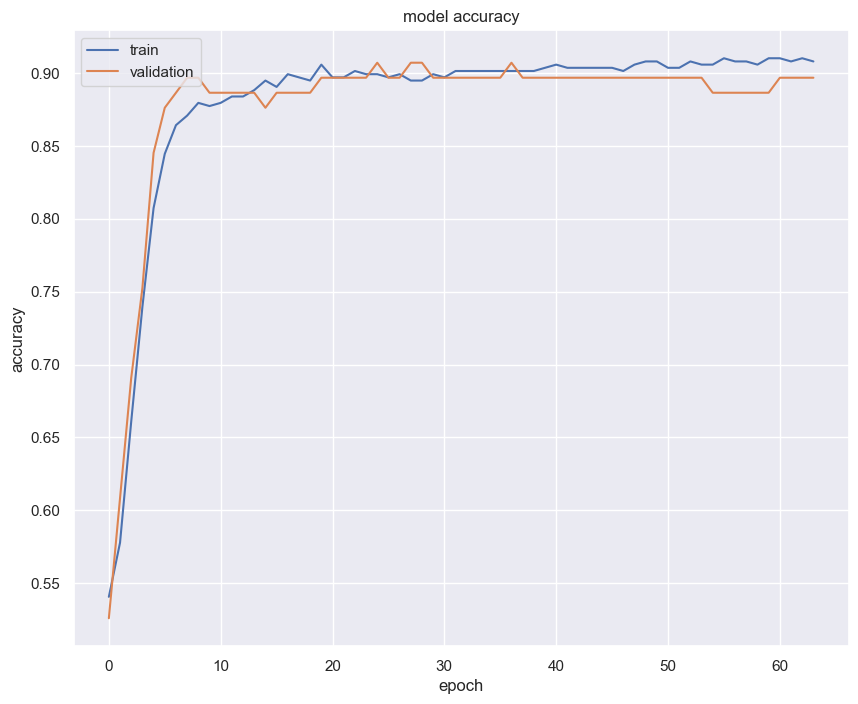

In [63]:
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [64]:
# EVALUATE TEST SET PERFORMANCE
model.evaluate(ds_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.3700 - accuracy: 0.8586


[0.36998841166496277, 0.8585858345031738]

On average, the model achieves 86% accuracy when evaluated with the test portion.

In [65]:
# eval = model.predict(ds_test)

In [66]:
#eval.argmax(axis=1)

In [67]:
## tf.math.confusion_matrix(y_2, eval.argmax(axis=1))

# SVM

## Kaggle Dataset

In [237]:
kaggle_lsvm_model = LinearSVC(random_state=0,
                       #tol=1e-5,
                       verbose=1,
                       #max_iter=1000,
                       )

In [238]:
kaggle_nlsvm_model = SVC(kernel='rbf', random_state=0)

In [223]:
kaggle_x_c_n

ID  CNT_CHILDREN  AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  \
0      0.000162      0.000000          0.098837    0.361207       1.000000   
1      0.004771      0.000000          0.098837    0.674348       0.029562   
2      0.005082      0.052632          0.055233    0.744721       0.038267   
3      0.005816      0.000000          0.136628    0.331031       0.032594   
4      0.006635      0.000000          0.186047    0.656457       0.039708   
...         ...           ...               ...         ...            ...   
36452  0.999965      0.052632          0.084302    0.812093       0.036681   
36453  0.999972      0.052632          0.084302    0.812093       0.036681   
36454  0.999979      0.052632          0.084302    0.812093       0.036681   
36455  0.999986      0.052632          0.084302    0.812093       0.036681   
36456  1.000000      0.000000          0.113372    0.325766       0.035561   

       FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS    F  ...  \
0                  0.0         0.0         0.0         0.052632  0.0  ...   
1                  0.0         1.0         0.0         0.052632  1.0  ...   
2                  1.0         0.0         0.0         0.052632  0.0  ...   
3                  1.0         0.0         0.0         0.052632  1.0  ...   
4                  1.0         1.0         0.0         0.052632  1.0  ...   
...                ...         ...         ...              ...  ...  ...   
36452              0.0         0.0         0.0         0.105263  1.0  ...   
36453              0.0         0.0         0.0         0.105263  1.0  ...   
36454              0.0         0.0         0.0         0.105263  1.0  ...   
36455              0.0         0.0         0.0         0.105263  1.0  ...   
36456              0.0         0.0         0.0         0.052632  0.0  ...   

       Managers  Medicine staff  None  Private service staff  Realty agents  \
0           0.0             0.0   1.0                    0.0            0.0   
1           0.0             0.0   1.0                    0.0            0.0   
2           0.0             0.0   0.0                    0.0            0.0   
3           0.0             0.0   0.0                    0.0            0.0   
4           0.0             0.0   1.0                    0.0            0.0   
...         ...             ...   ...                    ...            ...   
36452       0.0             0.0   0.0                    0.0            0.0   
36453       0.0             0.0   0.0                    0.0            0.0   
36454       0.0             0.0   0.0                    0.0            0.0   
36455       0.0             0.0   0.0                    0.0            0.0   
36456       0.0             0.0   0.0                    0.0            0.0   

       Sales staff  Secretaries  Security staff  Waiters/barmen staff  Label  
0              0.0          0.0             0.0                   0.0      1  
1              0.0          0.0             0.0                   0.0      1  
2              0.0          0.0             0.0                   0.0      1  
3              0.0          0.0             0.0                   0.0      1  
4              0.0          0.0             0.0                   0.0      1  
...            ...          ...             ...                   ...    ...  
36452          0.0          0.0             0.0                   0.0      0  
36453          0.0          0.0             0.0                   0.0      0  
36454          0.0          0.0             0.0                   0.0      0  
36455          0.0          0.0             0.0                   0.0      0  
36456          0.0          0.0             0.0                   0.0      0  

[36457 rows x 56 columns]

In [224]:
kaggle_x_c_n.drop("Label", axis=1, inplace=True)

In [225]:
kaggle_train_size = int(len(kaggle_x_c_n) * 0.7)

In [227]:
kaggle_test_size = len(kaggle_x_c_n) - kaggle_train_size

In [230]:
sample_index = np.random.choice(kaggle_x_c_n.index, kaggle_train_size, replace=False)
sample_index

array([31377, 30345, 29161, ..., 10535, 33363, 23059], dtype=int64)

In [232]:
kaggle_SVM_train = kaggle_x_c_n[kaggle_x_c_n.index.isin(sample_index)]

In [234]:
kaggle_SVM_train_target = kaggle_target[kaggle_target.index.isin(sample_index)]
kaggle_SVM_train_target

0        1
1        1
2        1
5        1
6        1
        ..
36448    0
36449    0
36452    0
36453    0
36454    0
Name: Label, Length: 25519, dtype: int64

In [235]:
kaggle_SVM_test = kaggle_x_c_n[~kaggle_x_c_n.index.isin(sample_index)]

In [236]:
kaggle_SVM_test_target = kaggle_target[~kaggle_target.index.isin(sample_index)]
kaggle_SVM_test_target

3        1
4        1
9        1
10       1
15       1
        ..
36436    0
36450    0
36451    0
36455    0
36456    0
Name: Label, Length: 10938, dtype: int64

In [239]:
kaggle_lsvm_model.fit(kaggle_SVM_train, kaggle_SVM_train_target)

[LibLinear]

LinearSVC(random_state=0, verbose=1)

In [240]:
pred = kaggle_lsvm_model.predict(kaggle_SVM_test)

In [241]:
sklearn.metrics.confusion_matrix(kaggle_SVM_test_target, pred)

array([[10755,     0],
       [  177,     6]], dtype=int64)

## UCI Dataset

In [73]:
lsvm_model = LinearSVC(random_state=0,
                       #tol=1e-5,
                       verbose=1,
                       #max_iter=1000,
                       )

In [74]:
nlsvm_model = SVC(kernel='rbf', random_state=0)

Randomly sampling data: 70% for training set, 30% for testing set

In [75]:
sample_index = np.random.choice(uci_X_n.index, train_size, replace=False)
sample_index

array([337,  42, 624, 392, 131, 318, 508, 168,  55, 674, 165, 239, 226,
       684, 559, 473, 387, 423, 465, 546, 259, 160,   0, 426, 158, 540,
       460, 169,  34, 370,   8, 464, 302, 209, 245, 407,  40, 550, 620,
        96, 677, 478, 513, 556, 554, 257, 483, 399,  29,   3,  53, 188,
       657, 195,  49, 640, 668,  22,  45, 276, 583, 627,  41, 669, 566,
       279, 472,  93, 644, 153, 471, 419, 345, 224, 552, 576, 101,  65,
       316, 237, 537, 414, 229, 495, 339, 509, 486, 496, 596, 604,  90,
       507, 362, 235, 108, 197, 655, 679, 511, 394, 152, 150,  98, 504,
       412, 322, 364, 170, 393, 418, 484, 244, 452,  19, 661, 470, 631,
       429, 580,  57, 545, 335, 648,  84, 492, 518, 542, 342, 534,  56,
       555, 110, 305, 297, 451, 665, 603, 252, 421, 686, 634, 187, 132,
       221, 211, 336, 688,  24, 386, 233,  38, 163, 519, 571, 499, 328,
       216, 220, 666, 549, 667, 208, 357, 204, 612, 161,  36, 568, 375,
       277, 689, 564, 629,  80, 600, 102,  88, 246, 567, 594, 26

In [76]:
SVM_train = uci_X_n[uci_X_n.index.isin(sample_index)]

In [77]:
SVM_train_target = uci_y_1[uci_y_1.index.isin(sample_index)]["code"]
SVM_train_target

0      0
1      0
2      0
3      0
4      0
      ..
684    1
685    1
686    1
688    1
689    1
Name: code, Length: 457, dtype: int64

In [78]:
SVM_test = uci_X_n[~uci_X_n.index.isin(sample_index)]

In [79]:
SVM_test_target = uci_y_1[~uci_y_1.index.isin(sample_index)]["code"]
SVM_test_target

5      0
7      0
9      0
11     0
12     0
      ..
664    1
671    1
676    1
683    1
687    1
Name: code, Length: 196, dtype: int64

In [80]:
#SVM_train = sklearn.utils.shuffle(SVM_train)
#SVM_test = sklearn.utils.shuffle(SVM_test)

In [81]:
lsvm_model.fit(SVM_train, SVM_train_target)

[LibLinear]

LinearSVC(random_state=0, verbose=1)

In [82]:
pred = lsvm_model.predict(SVM_test)

In [83]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [84]:
sklearn.metrics.confusion_matrix(SVM_test_target, pred)

array([[86,  6],
       [16, 88]], dtype=int64)

In [85]:
sklearn.metrics.accuracy_score(SVM_test_target, pred)

0.8877551020408163

In [86]:
nlsvm_model.fit(SVM_train, SVM_train_target)

SVC(random_state=0)

In [87]:
n_pred = nlsvm_model.predict(SVM_test)

In [88]:
sklearn.metrics.confusion_matrix(SVM_test_target, n_pred)

array([[87,  5],
       [20, 84]], dtype=int64)

In [89]:
sklearn.metrics.accuracy_score(SVM_test_target, n_pred)

0.8724489795918368